## Algemeen, data inladen

In [98]:
import pandas as pd
import datetime
from configparser import ConfigParser
import json, requests
from pysimplicate import Simplicate

# Simplicate
ini = ConfigParser()
ini.read('../credentials.ini')

subdomain = ini['simplicate']['subdomain']
api_key = ini['simplicate']['api_key']
api_secret = ini['simplicate']['api_secret']

sim = Simplicate(subdomain, api_key, api_secret )

# Hours file in Pandas format
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', 500)
PANDAS_FILE = '../simplicate_cache/hours.pd'
df = pd.read_pickle(PANDAS_FILE)

pd.options.display.float_format = '{:,.1f}'.format
#df['turnover'] = df.apply(lambda a: (a['hours']+a['corrections']) * (a['tariff'] if a['tariff'] > 0 else a['service_tariff']), axis=1)
#df['turnover'] = df.apply(lambda a: 0 if a['project_number'] == 'TOR-3'  and a['service'] == 'Development Sprints Q1' else a['turnover'], axis=1)
#df['week'] = df.apply(lambda a: datetime.datetime.strptime(a['day'],'%Y-%m-%d').isocalendar()[1], axis=1)
df[-20:]

,employee,organization,project_id,project_name,project_number,service,service_id,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,corrections_value
29857,Wouter Gerrits,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,MT,service:58ccd6739e80a061d8107a68a60f150e,normal,0.0,Internal,False,0.0,0.2,2021-10-18,to_forward,0.0,0.0,42,0.0
29858,Fleur van Eijk,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve yourself,service:5f68c33d197f3da5d8107a68a60f150e,normal,0.0,Internal,False,0.0,1.2,2021-10-18,to_forward,0.0,0.0,42,0.0
29859,Matthijs Blankevoort,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,service:6e599f61f95cd84dd250481ad7cc455b,normal,0.0,Internal,False,0.0,0.5,2021-10-18,to_forward,0.0,0.0,42,0.0
29860,Wouter Gerrits,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,HRM,service:84ab3eba5efee556d8107a68a60f150e,normal,0.0,Internal,False,0.0,5.0,2021-10-18,to_forward,0.0,0.0,42,0.0
29861,Redmar van der Hout,Sprout Money BV,project:c13cac383f1ad3a1feaad60b7a7437df,Sprout Money Infrastructure Improvements,SM21,Development Sprint,service:aab418330244f3d6b673c98d2eab4ca5,normal,87.5,Test engineer,False,85.0,2.5,2021-10-18,to_forward,0.0,212.5,42,0.0
29862,Jordy Boelhouwer,BAM,project:b702bba66765ebadfeaad60b7a7437df,Homestudios Traject 2021,BAM-1,Development Sprints Oktober,service:96f82c18d1b5c821b48628b99c52fe43,normal,95.0,Back-end Development,True,61.1,1.0,2021-10-18,to_forward,0.0,61.1,42,0.0
29863,Marijn Hurkens,ThiemeMeulenhoff B.V.,project:6ef4380cb31f1bc3feaad60b7a7437df,Examenbundel Release #2.2,THIE-24,Onderzoeksfase 2,service:77981178a95eabef827610813b27dd96,normal,95.0,Back-end Development,True,90.0,2.8,2021-10-18,to_forward,0.0,247.5,42,0.0
29864,Matthijs Blankevoort,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,service:7eea09b579ba1869d250481ad7cc455b,normal,95.0,Development,True,65.0,1.5,2021-10-18,to_forward,0.0,0.0,42,0.0
29865,Jordy Boelhouwer,BAM,project:b702bba66765ebadfeaad60b7a7437df,Homestudios Traject 2021,BAM-1,Development Sprints Oktober,service:96f82c18d1b5c821b48628b99c52fe43,normal,95.0,Back-end Development,True,61.1,0.5,2021-10-18,to_forward,0.0,30.6,42,0.0
29866,Jordy Boelhouwer,BAM,project:b702bba66765ebadfeaad60b7a7437df,Homestudios Traject 2021,BAM-1,Development Sprints Oktober,service:96f82c18d1b5c821b48628b99c52fe43,normal,95.0,Back-end Development,True,61.1,3.0,2021-10-18,to_forward,0.0,183.3,42,0.0


In [2]:
df['turnover'].sum()

2041589.4083333365

In [3]:
tor = df.query('project_number == "TOR-3"')     
tor.groupby(['service'])[['hours','turnover']].sum()

,hours,turnover
service,,
Development Sprint Q3,200.5,"11,436.9"
Development Sprint Q3 - fase 1,220.8,0.0
Development Sprints Q1&Q2,"3,126.5","248,403.2"
Ontwikkeling introductie film Travelbase,10.0,850.0
TOR 3.0 Fase 2 Ameland 2021,30.5,"2,696.2"
TOR 3.0 Fase 2 Schiermonnikoog 2021,21.2,"1,900.6"
TOR 3.0 Fase 2 Texel 2021,96.8,"9,743.8"
TOR 3.0 fase 2,59.0,"5,858.8"


In [4]:
tor.query('service != "Development Sprints Q1"')

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,corrections_value
84,Kelly de Haan,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1&Q2,normal,95.0,Back-end Development,False,0.0,0.0,2021-01-04,forwarded,0.0,0.0,1,0.0
85,Jochem Tijhuis,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1&Q2,normal,95.0,Back-end Development,False,0.0,0.0,2021-01-04,forwarded,0.0,0.0,1,0.0
221,Richard de Boer,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1&Q2,normal,110.0,Project Management,False,110.0,1.0,2021-01-05,projectmanager_approved,0.0,110.0,1,0.0
222,Eva Korteweg,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1&Q2,normal,110.0,Project Management,False,85.0,3.0,2021-01-05,projectmanager_approved,0.0,255.0,1,0.0
225,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1&Q2,normal,95.0,Front-end Development,False,0.0,0.0,2021-01-05,forwarded,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22534,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,normal,95.0,Back-end Development,True,112.5,4.0,2021-08-06,forwarded,0.0,450.0,31,0.0
22535,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3 - fase 1,normal,95.0,Back-end Development,False,0.0,4.0,2021-08-06,forwarded,0.0,0.0,31,0.0
22563,Richard de Boer,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,normal,110.0,Project Management,True,135.0,1.5,2021-08-06,forwarded,0.0,202.5,31,0.0
22646,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,normal,95.0,Back-end Development,True,112.5,8.0,2021-08-09,to_forward,0.0,900.0,32,0.0


## Focus op gewerkte uren, laat vrij/ziek eruit

In [2]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')
worked.describe()

,service_tariff,tariff,hours,corrections,turnover,corrections_value
count,"26,621.0","26,621.0","26,621.0","26,621.0","26,621.0","26,621.0"
mean,43.3,37.7,2.0,-0.1,82.1,-11.4
std,50.4,59.0,2.3,0.8,187.7,80.0
min,0.0,0.0,0.0,-9.0,-0.0,"-6,000.0"
25%,0.0,0.0,0.5,0.0,0.0,0.0
50%,0.0,0.0,1.0,0.0,0.0,0.0
75%,95.0,85.0,2.8,0.0,49.5,0.0
max,140.0,"6,000.0",11.0,4.0,"1,147.5",340.0


## Overzicht per dag/week

In [6]:
worked.groupby(['week','day'])[['hours','turnover']].sum()

hours  turnover
week day                        
1    2021-01-04  305.2   3,562.5
     2021-01-05  336.2  14,656.5
     2021-01-06  294.2  14,720.7
     2021-01-07  299.2  12,562.0
     2021-01-08  241.8  13,794.4
...                ...       ...
32   2021-08-09   82.5   3,989.9
     2021-08-10    0.8       0.0
53   2021-01-01    0.0       0.0
     2021-01-02    2.0      42.5
     2021-01-03    2.5       0.0

[216 rows x 2 columns]

In [7]:
worked.groupby(['week'])[['hours','turnover']].sum()

,hours,turnover
week,,
1,"1,481.3","59,338.4"
2,"1,582.5","73,650.5"
3,"1,553.5","68,014.7"
4,"1,525.5","62,961.4"
5,"1,580.2","63,381.9"
6,"1,459.1","83,711.0"
7,"1,630.5","77,740.6"
8,"1,512.0","78,616.7"
9,"1,649.0","80,910.4"


## Per persoon

In [8]:
teamview = pd.DataFrame( worked )
team = sorted([str(t) for t in teamview.employee.unique()])
for t in team:
    teamview[t] = teamview.apply(lambda a: a['turnover'] if a['employee'] == t else 0, axis=1)
cols= ['hours','turnover'] + team
pppw = teamview.groupby(['week'])[cols].sum().query('turnover > 0').T
pppw = pppw.drop( ['hours','turnover','Freelancer','Hans-Peter Harmsen', 'Gert Braun', 'Richard de Boer', 
                   'Joost Cornelissen', 'Jasper Bok', 'Mel Schuurman', 'Martijn van Klaveren', 
                   'Angela Duijs', 'Lunah Smits','Michiel Willekens', 'Wouter Gerrits'])
pppw.loc['mean'] = pppw.mean()
cols = ['week'+str(col) for col in pppw.columns]
pppw.columns = cols
maxVal = 3000
for col in cols:
    pppw[col] = pppw[col].where(pppw[col] < maxVal, maxVal)
pppw

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,week18,week19,week20,week21,week22,week23,week24,week25,week26,week27,week28,week29,week30,week31,week32,week53
Bas Colenbrander,680.0,640.0,"1,340.0","2,315.0",170.0,"1,077.5","1,651.2","2,616.2",981.2,445.0,"1,283.8","1,637.5",380.0,400.0,850.0,"1,748.8",385.0,55.0,0.0,0.0,0.0,80.0,0.0,0.0,"2,040.0",255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caspar Geerlings,435.0,"1,159.5","1,030.0",511.8,"1,069.5",972.2,735.0,717.5,769.2,"1,642.5","1,080.0",947.5,"1,731.8",842.0,"1,172.0",630.0,308.0,721.5,392.2,654.5,647.0,"1,490.0",771.5,"1,015.5",406.0,624.8,577.5,894.5,460.5,507.0,938.2,0.0,0.0
Chris Neven,"2,125.0","3,000.0","2,537.5",193.8,"2,518.8","3,000.0","2,886.9","3,000.0","3,000.0","3,000.0","3,000.0","2,441.2","2,654.4","2,480.0","2,983.8","3,000.0","2,596.2","3,000.0","2,325.0","3,000.0","2,481.2","3,000.0","3,000.0","3,000.0","2,937.5","3,000.0","2,755.0",0.0,0.0,0.0,0.0,0.0,0.0
Eva Korteweg,"1,202.5","1,613.8","2,116.2",587.5,"1,094.4","1,420.6","1,720.6","1,243.8","1,336.9",953.1,"1,520.0","2,051.2","1,518.8","1,378.8","1,900.0","1,620.6","1,537.5","1,982.5","2,307.5","1,468.8","1,327.5","1,151.2","1,582.5",593.8,"2,663.8","2,073.1","1,891.9","1,051.9",726.2,"1,028.1",896.9,150.6,0.0
Fadhlur Zahri,"1,064.2",492.7,778.5,"1,787.5","1,536.5","1,685.8","1,180.0","1,097.5","2,271.8","2,713.5","2,471.5","1,132.9",982.7,797.3,"1,456.0","1,265.0",715.0,"2,928.8","1,267.5",82.5,777.5,"1,974.7","2,584.4","2,634.5","1,559.2","2,275.0","1,422.5","1,455.0","1,337.5","1,626.7","1,999.9",420.8,0.0
Filipe José Mariano dos Santos,"2,720.0","2,260.0","2,305.0","2,720.0","2,550.0",680.0,"2,897.5","3,000.0","2,885.0","3,000.0","3,000.0","3,000.0",680.0,"2,470.0","1,880.0","3,000.0","2,757.5","2,360.0","1,912.5","1,545.0","2,725.0","3,000.0","2,867.5","3,000.0","2,520.0",0.0,"2,577.5","3,000.0","2,577.5","2,563.8","2,805.0",0.0,0.0
Fleur van Eijk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Geert-Jan van Mastrigt,"2,115.0","2,040.0","1,848.8","1,912.5","1,275.0","2,152.5","1,912.5",886.2,"1,810.0","1,615.0","1,572.5",0.0,0.0,"1,700.0","1,845.0","1,460.0","1,190.0","1,360.0",765.0,"1,700.0","1,147.5","1,700.0","1,487.5","1,317.5",340.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
George Tsimenis,"3,000.0","3,000.0","3,000.0","2,970.0",440.0,"3,000.0","2,060.0","2,205.0","2,350.0","3,000.0","2,200.0","3,000.0",0.0,"2,080.0","1,615.0","2,422.5","2,380.0","3,000.0","1,535.0","2,422.5","2,295.0","1,645.0","1,395.0","1,555.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gerben van Dijk,"2,345.0","2,681.2","2,566.2","1,573.8","1,987.5","3,000.0","1,423.8","2,412.5","1,861.2","2,647.5","1,567.5","2,911.2","2,627.5","1,950.0","2,617.5","2,652.5","1,275.0","3,000.0","2,591.2","3,000.0",110.0,"2,802.5","3,000.0","3,000.0","3,000.0","3,000.0",0.0,0.0,712.5,548.8,996.2,0.0,0.0


In [9]:
[str(col) for col in pppw.columns]

['week1',
 'week2',
 'week3',
 'week4',
 'week5',
 'week6',
 'week7',
 'week8',
 'week9',
 'week10',
 'week11',
 'week12',
 'week13',
 'week14',
 'week15',
 'week16',
 'week17',
 'week18',
 'week19',
 'week20',
 'week21',
 'week22',
 'week23',
 'week24',
 'week25',
 'week26',
 'week27',
 'week28',
 'week29',
 'week30',
 'week31',
 'week32',
 'week53']

In [10]:
!pip install matplotlib

You should consider upgrading via the '/Users/hp/proj/dashboard/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
%matplotlib inline


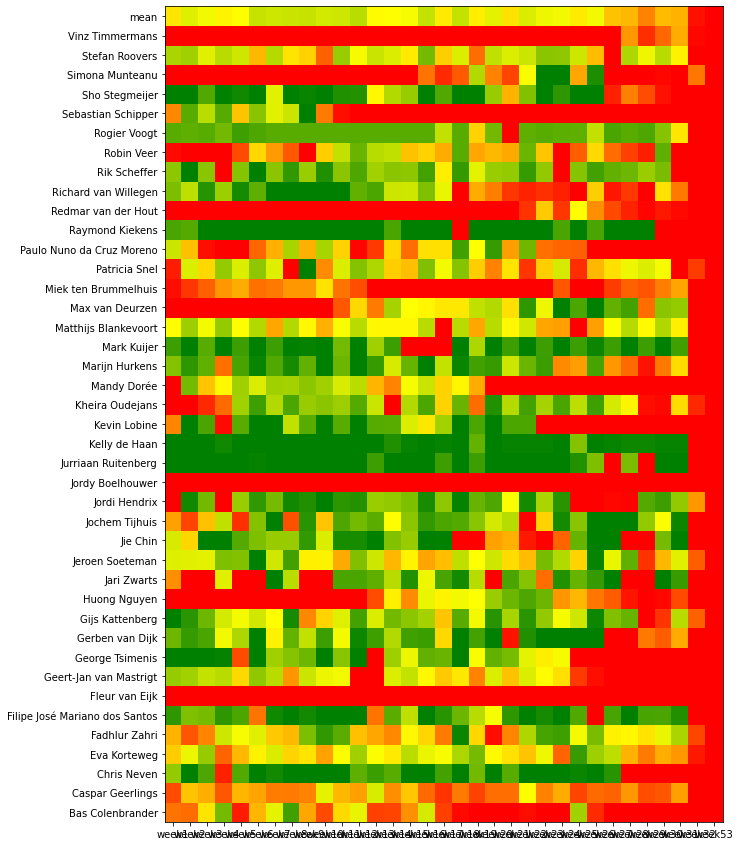

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.figsize'] = [10, 15]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.pcolor(pppw, cmap=cmap)
plt.yticks(np.arange(0.5, len(pppw.index), 1), pppw.index)
plt.xticks(np.arange(0.5, len(pppw.columns), 1), pppw.columns)
#plt.set_size(500,800)
plt.show()

## Specifics
### Werk door een medewerker in een week

In [13]:
def person_week( employee, week ):
    filtered = df.query( f'employee == "{employee}" and week=={week}' )
    print( filtered.groupby(['week','day','project_name'])[['hours','corrections','turnover']].sum())
    totals = filtered[['hours','corrections','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[2])}')    
    
    
person_week( 'Jordi Hendrix', 2)    

                              hours  corrections  turnover
week day        project_name                              
2    2021-01-11 Internal        1.0          0.0       0.0
                TOR 3.0         7.0          0.0       0.0
     2021-01-12 Internal        0.0          0.0       0.0
                TOR 3.0         8.0          0.0       0.0
     2021-01-14 TOR 3.0         8.0          0.0       0.0
     2021-01-15 Internal        0.5          0.0       0.0
                TOR 3.0         7.5          0.0       0.0
Totals 32, €0


In [14]:
df.query( f'employee ==  "Jordi Hendrix" and week==2' )

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
741,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,1.0,2021-01-11,projectmanager_approved,0.0,0.0,2
742,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,7.0,2021-01-11,projectmanager_approved,0.0,0.0,2
908,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.0,2021-01-12,forwarded,0.0,0.0,2
909,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,8.0,2021-01-12,projectmanager_approved,0.0,0.0,2
1229,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,8.0,2021-01-14,projectmanager_approved,0.0,0.0,2
1382,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,7.5,2021-01-15,projectmanager_approved,0.0,0.0,2
1383,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.0,2021-01-15,forwarded,0.0,0.0,2
1384,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.5,2021-01-15,projectmanager_approved,0.0,0.0,2


In [15]:
person_week( 'Filipe José Mariano dos Santos', 4)

                                   hours  corrections  turnover
week day        project_name                                   
4    2021-01-25 CopyCoin M&S 2021    7.0          0.0     595.0
                Internal             1.0          0.0       0.0
     2021-01-26 CopyCoin M&S 2021    2.5          0.0     212.5
                Internal             5.5          0.0       0.0
     2021-01-27 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-28 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-29 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
Totals 40, €2720


In [16]:
person_week( 'Jordi Hendrix', 4)

                              hours  corrections  turnover
week day        project_name                              
4    2021-01-25 Internal        1.0          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-26 Internal        0.5          0.0       0.0
                TOR 3.0         7.8         -7.8       0.0
     2021-01-28 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-29 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
Totals 31, €0


### Werk aan een specifiek project in een week

In [17]:
def project_week( project, week ):
    filtered = df.query( f'project_number == "{project}" and week=={week}' )
    print( filtered.groupby(['week','day','employee'])[['hours','turnover']].sum())
    totals = filtered[['hours','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[1])}')    
    
project_week( 'TOR-3', 4)


                                      hours  turnover
week day        employee                             
4    2021-01-25 Chris Neven             7.5       0.0
                Eva Korteweg            3.0       0.0
                Jordi Hendrix           7.0       0.0
                Kevin Lobine            7.2       0.0
                Mandy Dorée             2.2       0.0
                Marijn Hurkens          7.5       0.0
                Richard de Boer         1.0       0.0
     2021-01-26 Chris Neven             8.0       0.0
                Eva Korteweg            2.5       0.0
                Jordi Hendrix           7.8       0.0
                Kevin Lobine            8.0       0.0
                Mandy Dorée             1.5       0.0
                Marijn Hurkens          7.5       0.0
                Richard de Boer         2.0       0.0
                Richard van Willegen    2.5       0.0
     2021-01-27 Chris Neven             8.5       0.0
                Kevin Lobine

## Productiviteit

In [24]:

def percentages(working):
    tot_hours = working['hours'].sum()
    print( f'tot hours {tot_hours:.0f}')
    
    client_hours = working.query('organization not in ("Oberon", "Qikker Online B.V.")')['hours'].sum()
    print( f'client hours {client_hours:.0f}' )
    
    
    billable_hours = working.query('tariff > 0 or service_tariff>0')['hours'].sum()+working.query('tariff > 0 or service_tariff>0')['corrections'].sum()
    print( f'billiable hours {billable_hours:.0f}' )
    
    productivity = round( client_hours / tot_hours * 100,0)
    print( f'productief {productivity:.0f}%' )
    
    billable = round( billable_hours / tot_hours * 100,0)
    print( f'billable {billable:.0f}%' )
    
    turnover = round( working['turnover'].sum() )
    print( f'turnover {turnover/1000:.0f} K' )

### Productiviteit van iedereen

In [25]:
working = df.query('type=="normal"')
percentages( working )

tot hours 43498
client hours 25492
billiable hours 23362
productief 59%
billable 54%
turnover 2042 K


### Productiviteit productiemensen

In [30]:
production_users = ['Gerben van Dijk', 'Sebastian Schipper', 'Filipe José Mariano dos Santos', 'Geert-Jan van Mastrigt', 'George Tsimenis', 'Marijn Hurkens', 'Kevin Lobine', 'Stefan Roovers', 'Bas Colenbrander', 'Caspar Geerlings', 'Jie Chin', 'Chris Neven', 'Fadhlur Zahri', 'Gijs Kattenberg', 'Jari Zwarts', 'Jasper Bok', 'Jeroen Soeteman', 'Jochem Tijhuis', 'Jordi Hendrix', 'Jurriaan Ruitenberg', 'Mark Kuijer', 'Matthijs Blankevoort', 'Paulo Nuno da Cruz Moreno', 'Raymond Kiekens', 'Richard van Willegen', 'Rik Scheffer', 'Robin Veer', 'Rogier Voogt', 'Sho Stegmeijer', 'Patricia Snel', 'Eva Korteweg', 'Kelly de Haan', 'Kheira Oudejans', 'Mandy Dorée', 'Miek ten Brummelhuis']
production_users = list(df['employee'].unique())
working = df.query(f'type=="normal" and employee in {production_users}')
percentages( working )

tot hours 43498
client hours 25492
billiable hours 23362
productief 59%
billable 54%
turnover 2042 K


## Productivteit per persoon

In [31]:
for user in production_users:
    working = df.query(f'type=="normal" and employee == "{user}"')
    if working['hours'].sum():
        print( user )
        percentages( working )
        print()

Filipe José Mariano dos Santos
tot hours 1152
client hours 950
billiable hours 896
productief 83%
billable 78%
turnover 77 K

Gerben van Dijk
tot hours 1054
client hours 766
billiable hours 778
productief 73%
billable 74%
turnover 67 K

Marijn Hurkens
tot hours 1076
client hours 919
billiable hours 868
productief 85%
billable 81%
turnover 65 K

Patricia Snel
tot hours 845
client hours 504
billiable hours 512
productief 60%
billable 61%
turnover 44 K

Sebastian Schipper
tot hours 392
client hours 216
billiable hours 216
productief 55%
billable 55%
turnover 19 K

Stefan Roovers
tot hours 920
client hours 596
billiable hours 603
productief 65%
billable 66%
turnover 50 K

Kevin Lobine
tot hours 796
client hours 684
billiable hours 644
productief 86%
billable 81%
turnover 52 K

Freelancer
tot hours 67
client hours 67
billiable hours 67
productief 100%
billable 100%
turnover 6 K

Joost Cornelissen
tot hours 1009
client hours 142
billiable hours 155
productief 14%
billable 15%
turnover 14 K



## Interne uren

In [22]:
working.query('tariff == 0 and service_tariff==0').groupby(['project_name','service'])['hours'].sum()

project_name  service                      
Internal      Finance                         10.0
              HRM                              5.2
              ObSessions - Improve Oberon     47.2
              ObSessions - Improve yourself   11.5
              Office                           4.5
              Operations                      50.2
              Other / Unaccountable           14.0
              Recruitment                      0.8
              Sales                            2.0
              Teambuilding                    24.5
Name: hours, dtype: float64

## Uren submitten

In [23]:
def post(url_path: str, post_fields: dict):
    headers = {
        'Authentication-Key': api_key,
        'Authentication-Secret': api_secret,
        'Content-type': 'application/json',
        'Accept': 'text/plain',
    }
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    print( 'POST', url, post_fields, headers)
    return requests.post(url, json=post_fields, headers=headers)


def get(url_path: str):
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    headers = {'Authentication-Key': api_key, 'Authentication-Secret': api_secret}
    response = requests.get(url, headers=headers, timeout=15)
    return response.json()['data']

In [24]:
print( get( '/hrm/employee?q[full_name]="Hans-Peter Harmsen"') )

NameError: name 'subdomain' is not defined

In [ ]:
employee_id = get( '/hrm/employee?q[name]=Hans-Peter Harmsen')[0]['id']
project_id = get('/projects/project?q[project_number]=OBE-1')[0]['id']
service_id = get(f'/projects/service?q[project_id]={project}&q[name]=Finance')[0]['id']
hourstype_id = get('/hours/hourstype?q[label]=Internal')[0]['id']

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d %H:%M:%S'),
  "note": "test vanuit Jupyter"
}
postdata

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d'),
  "note": "test vanuit Jupyter 2"
}
postdata

In [ ]:
#res = post( '/hours/hours', post_fields = postdata)
#res

In [ ]:
def find_bookable1( zoek):
    zoek = zoek.lower()
    projects = get('/projects/project?q[active]=True')
    projects = {p['id']:p['organization']['name']+ ' ' + p['name'] for p in projects}
    services = get(f'/projects/service?q[status]=open')

    res = []
    for s in services:
        if not s['project_id'] in projects.keys() or not s.get('name'):
            continue
        found_services = []
        for h in s.get('hour_types',[]):
            full_name = projects[s['project_id']] + ' ' + s['name'] + ' ' + h['hourstype']['label']
            full_name = full_name.replace( ' Internal ', ' ')
            if not full_name.lower().count(zoek):
                continue
            found_services += [full_name]
            print( s['id'] + ' ' + full_name)
            res += [( s['project_id'], s['id'], h['id'] )]
    if len(res) == 1:
        return res[0]
    if len(res) == 0:
        print( 'No service found')
    else:
        print( 'Multiple services found')
        for f in found_services:
            print( f )
    return None, None, None


In [ ]:
find_bookable1( 'int')

In [ ]:
services = get(f'/projects/service?q[status]=open')
ser

In [ ]:
projects = get('/projects/service?q[status]=open')
print( len( projects))

In [ ]:
projects = get('/projects/project?q[project_status.label]=active')
print( len( projects))

In [ ]:
w9 = df.query('week==9')
w9['turnover'].sum()

In [ ]:
w9['day'].max()

In [ ]:
w9_proj = w9.query('turnover>0').groupby(['project_number']).sum('turnover')
w9_proj

# Uren van persoon in specifieke week

In [33]:
teamview.query('employee=="Sho Stegmeijer" and week==13')

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,Angela Duijs,Bas Colenbrander,Caspar Geerlings,Chris Neven,Eva Korteweg,Fadhlur Zahri,Filipe José Mariano dos Santos,Freelancer,Geert-Jan van Mastrigt,George Tsimenis,Gerben van Dijk,Gert Braun,Gijs Kattenberg,Hans-Peter Harmsen,Huong Nguyen,Jari Zwarts,Jasper Bok,Jeroen Soeteman,Jie Chin,Jochem Tijhuis,Joost Cornelissen,Jordi Hendrix,Jurriaan Ruitenberg,Kelly de Haan,Kevin Lobine,Kheira Oudejans,Lunah Smits,Mandy Dorée,Marijn Hurkens,Mark Kuijer,Martijn van Klaveren,Matthijs Blankevoort,Max van Deurzen,Mel Schuurman,Michiel Willekens,Miek ten Brummelhuis,Patricia Snel,Paulo Nuno da Cruz Moreno,Raymond Kiekens,Richard de Boer,Richard van Willegen,Rik Scheffer,Robin Veer,Rogier Voogt,Sebastian Schipper,Sho Stegmeijer,Stefan Roovers,Wouter Gerrits
9212,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,3.0,2021-03-29,forwarded,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9250,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,5.0,2021-03-29,projectmanager_approved,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9365,Sho Stegmeijer,Havas Lemz,project:c307ab1c05c26dfdfeaad60b7a7437df,FME Platform,HAVA-2,Concept & Design 2021,normal,125.0,Creative Direction,True,110.0,3.0,2021-03-30,forwarded,0.0,330.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0
9397,Sho Stegmeijer,Havas Lemz,project:c307ab1c05c26dfdfeaad60b7a7437df,FME Platform,HAVA-2,Concept & Design 2021,normal,125.0,Creative Direction,True,110.0,5.0,2021-03-30,forwarded,0.0,550.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0
9516,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve yourself,normal,0.0,Internal,False,0.0,3.0,2021-03-31,forwarded,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9537,Sho Stegmeijer,Oerol,project:216e75fe9b88e377feaad60b7a7437df,Platform,OER-1,Development Sprint Fiona koppeling,normal,95.0,Front-end Development,True,95.0,1.5,2021-03-31,projectmanager_approved,0.0,142.5,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.5,0.0,0.0
9550,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,3.5,2021-03-31,projectmanager_approved,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9646,Sho Stegmeijer,Havas Lemz,project:c307ab1c05c26dfdfeaad60b7a7437df,FME Platform,HAVA-2,Concept & Design 2021,normal,125.0,Creative Direction,True,110.0,0.5,2021-04-01,forwarded,0.0,55.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0
9654,Sho Stegmeijer,Obe

In [12]:
sept = worked.query( 'day>"2021-08-31" and turnover>0')

In [14]:
sept['turnover'].sum()

233156.0

In [15]:
sept['hours'].sum()

2517.5

In [13]:
sept

,employee,organization,project_id,project_name,project_number,service,service_id,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,corrections_value
24959,Vinz Timmermans,Sprout Money BV,project:1675e5dd3dbf6d78feaad60b7a7437df,Slim Beleggen Agile,SM2021,Sprint 111,service:ed6134dfc6bdf519827610813b27dd96,normal,110.0,Project Management,False,85.0,4.0,2021-09-01,projectmanager_approved,0.0,340.0,35,0.0
24960,Vinz Timmermans,Sprout Money BV,project:1675e5dd3dbf6d78feaad60b7a7437df,Slim Beleggen Agile,SM2021,Sprint 111,service:ed6134dfc6bdf519827610813b27dd96,normal,110.0,Project Management,False,85.0,0.2,2021-09-01,projectmanager_approved,0.0,21.2,35,0.0
24961,Vinz Timmermans,Sprout Money BV,project:1675e5dd3dbf6d78feaad60b7a7437df,Slim Beleggen Agile,SM2021,Sprint 111,service:ed6134dfc6bdf519827610813b27dd96,normal,110.0,Project Management,False,85.0,1.0,2021-09-01,projectmanager_approved,0.0,85.0,35,0.0
24962,Vinz Timmermans,Sprout Money BV,project:1675e5dd3dbf6d78feaad60b7a7437df,Slim Beleggen Agile,SM2021,Sprint 111,service:ed6134dfc6bdf519827610813b27dd96,normal,110.0,Project Management,False,85.0,0.5,2021-09-01,projectmanager_approved,0.0,42.5,35,0.0
24963,Richard van Willegen,Collabhouse BV,project:85b01899fbac9f06feaad60b7a7437df,Collabhouse platform,COL-1,Fase 4 - Development sprint 1,service:ed6134dfc6bdf519f0d06734914aca76,normal,95.0,Front-end Development,True,135.0,0.5,2021-09-01,projectmanager_approved,0.0,67.5,35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27819,Fadhlur Zahri,De Volksbank,project:5c27573283b28d55feaad60b7a7437df,Eurowijs - SLA,EUR-1,Service (JM),service:9c9df07733623094d8107a68a60f150e,normal,110.0,Service basic laag,True,99.0,1.8,2021-09-30,to_forward,0.0,173.2,39,0.0
27821,Fadhlur Zahri,Amsterdam Internet Exchange BV.,project:b3f4f7e167cff85cfeaad60b7a7437df,AMS-IX SLA,AMS-1,Service Basic,service:6e599f61f95cd84ddbbc6eee40e2b5f7,normal,110.0,Service basic laag,True,110.0,0.8,2021-09-30,to_forward,0.0,82.5,39,0.0
27823,Redmar van der Hout,Collabhouse BV,project:85b01899fbac9f06feaad60b7a7437df,Collabhouse platform,COL-1,Fase 4 - Development sprint 3,service:96f82c18d1b5c821dbbc6eee40e2b5f7,normal,80.0,Testing,True,87.5,1.2,2021-09-30,to_forward,0.0,109.4,39,0.0
27824,Kheira Oudejans,IDFA,project:91de1d224a39b0f5feaad60b7a7437df,Doorontwikkeling 2021,IDFA-4,Festivalrelease 2021 Deel 2,service:ed6134dfc6bdf519b673c98d2eab4ca5,normal,95.0,Front-end Development,True,80.0,4.0,2021-09-30,forwarded,0.0,320.0,39,0.0


# Berekeningen tbv billable uren en gemiddeld uurtarief in maandrapportage

In [16]:
worked['hours'].sum()/9

5829.662962962963

In [17]:
worked['turnover'].sum()/9

242915.26018518608

In [20]:
worked['hours'].sum()/40/(3/4*52)

33.63267094017094

In [21]:
worked['turnover'].sum()/worked['hours'].sum()


41.66883432686868

In [23]:
client = df.query('organization !="Oberon"')
client['hours'].sum()

30087.516666666666

In [24]:
client['turnover'].sum()

2113832.3416666742

In [2]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')

In [3]:
worked_aug = worked.query('day >="2021-08-01" and day<"2021-09-01"')

In [4]:
worked_aug_clients = worked_aug.query('organization not in ("Oberon", "Qikker Online B.V.")')

In [5]:
worked_aug['turnover'].sum()

217630.09166666667

In [6]:
worked_aug_clients['turnover'].sum()

197731.34166666667

In [10]:
worked_aug_clients['hours'].sum()

2421.1666666666665

In [11]:
worked_aug_clients['turnover'].sum()/worked_aug_clients['hours'].sum()


81.66779445171062

## Verschil in billable tussen dashboard en Simplicate

In [62]:
from_date = datetime.date.today() + datetime.timedelta(weeks=-2)
until_date = datetime.date.today() + datetime.timedelta(weeks=-1)


def total(field, query=''):
    if query:
        query += ' and '
    query += f'day >="{from_date}" and day < "{until_date}"'
    return int(df.query( query )[field].sum())

from_date.strftime('%Y-%m-%d'), until_date.strftime('%Y-%m-%d')

('2021-09-22', '2021-09-29')

### productiviteit

In [65]:
# Percentage van geboekte uren door het hele team op productietaken
# zoals FE, Non-billable, PM of Testing. Tussen 1 en 2 weken geleden
alle_uren_iedereen =  total( 'hours')
print( 'alle uren iedereen:', alle_uren_iedereen)

productieve_uren_iedereen =  total( 'hours', 'type=="normal" and organization not in ("Oberon")')
print( 'productieve uren iedereen:', productieve_uren_iedereen)

gewerkte_uren_iedereen = total( 'hours',  'type=="normal"')
print( 'gewerkte uren iedereen:', gewerkte_uren_iedereen)
                                  
productiviteit_iedereen = int(productieve_uren_iedereen / gewerkte_uren_iedereen * 100)
print( f'productiviteit iedereen: {productiviteit_iedereen}%', )


billability_iedereen = int(productieve_uren_iedereen / alle_uren_iedereen * 100)
print( f'billability iedereen: {billability_iedereen}%', )

alle uren iedereen: 1503
productieve uren iedereen: 652
gewerkte uren iedereen: 1302
productiviteit iedereen: 50%
billability iedereen: 43%


### omzet

In [52]:
omzet =  total( 'turnover', 'type=="normal" and organization not in ("Oberon", "Qikker Online B.V.")')
print( 'omzet:', omzet)

omzet: 51413


# Berekening van aantal beschikbare uren

In [100]:

interns = [e['name'] for e in sim.employee( {'function':'Stagiair'})]
grouped = (df
    .query(f'day>="{fromdate}" and day<"{untildate}" and employee not in @interns')     # Filter on date range
    .groupby(['employee', 'day', 'type'])[['hours']].sum() # Group hours by employee, day and type
    .unstack()      # Dubbel niveau headers eruit
    .fillna(0)      # Nan -> 0
    .reset_index()) # Convert indexes to columns
grouped.columns = ['employee', 'day', 'absence', 'leave', 'normal']
grouped['available'] = grouped.apply(lambda a: min(8, round((a['normal']) / 4, 0) * 4), axis=1) # Round to closest multiple of 4
available = grouped['available'].sum()
available

NameError: name 'fromdate' is not defined